# Fine-Tuning

In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2021-07-08 18:40:22--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-07-08 18:40:22 (105 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir
import tensorflow as tf

# Getting some data

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2021-07-08 18:38:01--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.128, 142.251.2.128, 142.250.141.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   166MB/s    in 1.0s    

2021-07-08 18:38:02 (166 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
import zipfile

zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip")
zip_ref.extractall()
zip_ref.close()

In [ ]:
train_dir_10 = "/content/10_food_classes_10_percent/train"
test_dir = "/content/10_food_classes_10_percent/test"

In [ ]:
walk_through_dir("/content/10_food_classes_10_percent")

There are 2 directories and 0 images in '/content/10_food_classes_10_percent'.
There are 10 directories and 0 images in '/content/10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '/content/10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '/content/10_food_classe

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

train_data = train_datagen.flow_from_directory(train_dir_10,
                                               class_mode = "categorical",
                                               batch_size = 32,
                                               target_size = (224,224))

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224,224),
                                             class_mode = "categorical",
                                             batch_size = 32)

'\nfrom tensorflow.keras.preprocessing.image import ImageDataGenerator\n\ntrain_datagen = ImageDataGenerator(rescale = 1/255.)\ntest_datagen = ImageDataGenerator(rescale = 1/255.)\n\ntrain_data = train_datagen.flow_from_directory(train_dir,\n                                               class_mode = "categorical",\n                                               batch_size = 32,\n                                               target_size = (224,224))\n\ntest_data = test_datagen.flow_from_directory(test_dir,\n                                             target_size = (224,224),\n                                             class_mode = "categorical",\n                                             batch_size = 32)\n'

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

IMG_SHAPE = (224,224)

train_data_10_percent = image_dataset_from_directory(directory = train_dir_10,
                                                     image_size = IMG_SHAPE,
                                                     label_mode = "categorical",
                                                     batch_size = 32)

test_data = image_dataset_from_directory(directory = test_dir,
                                         image_size = IMG_SHAPE,
                                         label_mode = "categorical",
                                         batch_size = 32)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
train_data.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
for images, labels in train_data.take(1):
  print(images, labels)

# Creating a model

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
input = keras.Input(shape=(224,224,3))

In [ ]:
dense = tf.keras.applications.EfficientNetB0(include_top = False,
                                             input_shape=(224,224,3),
                                             classes = 10,
                                             pooling = "max")

In [ ]:
x = dense(input)

In [ ]:
outputs = layers.Dense(10, activation="softmax")(x)

In [ ]:
model_efficientNet = keras.Model(inputs=input, outputs=outputs)

In [ ]:
model_efficientNet.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, 1280)              4049571   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                12810     
Total params: 4,062,381
Trainable params: 4,020,358
Non-trainable params: 42,023
_________________________________________________________________


In [ ]:
model_efficientNet.compile(loss = tf.keras.losses.categorical_crossentropy,
                           optimizer = tf.keras.optimizers.Adam(),
                           metrics = ["accuracy"])

In [ ]:
history_model_efficientNet = model_efficientNet.fit(train_data,
                                                    epochs = 5,
                                                    steps_per_epoch = len(train_data),
                                                    validation_data = test_data,
                                                    validation_steps = len(test_data),
                                                    callbacks = [create_tensorboard_callback("histories",
                                                                                             "efficientNet_history")])

Saving TensorBoard log files to: histories/efficientNet_history/20210707-123532
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 309s 13s/step - loss: 3.2013 - accuracy: 0.4027 - val_loss: 1.6464 - val_accuracy: 0.6200
Epoch 2/5
24/24 [==============================] - 297s 13s/step - loss: 0.3516 - accuracy: 0.8800 - val_loss: 1.5637 - val_accuracy: 0.6788
Epoch 3/5
24/24 [==============================] - 258s 11s/step - loss: 0.1456 - accuracy: 0.9493 - val_loss: 1.8194 - val_accuracy: 0.6528
Epoch 4/5
24/24 [==============================] - 298s 13s/step - loss: 0.1151 - accuracy: 0.9667 - val_loss: 1.6112 - val_accuracy: 0.6924
Epoch 5/5
24/24 [==============================] - 298s 13s/step - loss: 0.0569 - accuracy: 0.9747 - val_loss: 1.2297 - val_accuracy: 0.7412


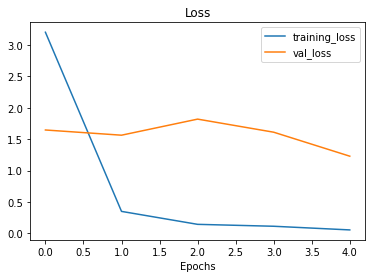

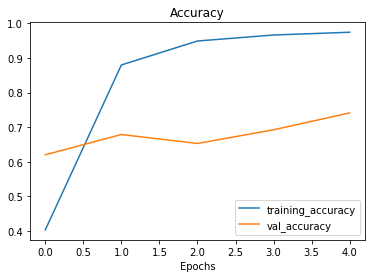

In [ ]:
plot_loss_curves(history_model_efficientNet)

# The code in the video

In [ ]:
# Creating the base model
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# Freezing the base model
base_model.trainable = False

# Creating inputs into our model
inputs = tf.keras.layers.Input(shape = (224, 224, 3), name="input_layer")

# If we using a model like Resnet50v2 we need to normalize the inputs. we do this by; (we don t need any scaling for efficientNet)
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1/255.)(inputs)

# Passing the inputs to the base model
x = base_model(inputs)

# Average pool the outputs of the base model (aggregate all the most important information, reduce number of computations)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

# Creating output activation layer
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

# Combining the inputs with the outputs into a model
model_0 = tf.keras.Model(inputs, outputs)

# Compiling the model
model_0.compile(loss = tf.keras.losses.categorical_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fitting the model
history_0 = model_0.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data),
                        callbacks = [create_tensorboard_callback("histories","history_0")])

Saving TensorBoard log files to: histories/history_0/20210707-134530
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 181s 8s/step - loss: 1.9376 - accuracy: 0.3733 - val_loss: 1.3778 - val_accuracy: 0.6812
Epoch 2/5
24/24 [==============================] - 174s 7s/step - loss: 1.1672 - accuracy: 0.7360 - val_loss: 0.9373 - val_accuracy: 0.7896
Epoch 3/5
24/24 [==============================] - 136s 6s/step - loss: 0.8622 - accuracy: 0.8053 - val_loss: 0.7620 - val_accuracy: 0.8164
Epoch 4/5
24/24 [==============================] - 174s 7s/step - loss: 0.6998 - accuracy: 0.8333 - val_loss: 0.6731 - val_accuracy: 0.8276
Epoch 5/5
24/24 [==============================] - 174s 7s/step - loss: 0.5938 - accuracy: 0.8720 - val_loss: 0.6140 - val_accuracy: 0.8376


In [ ]:
# Check the layers in the "base model"
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_8
1 rescaling_4
2 normalization_4
3 stem_conv_pad
4 stem_conv
5 stem_bn
6 stem_activation
7 block1a_dwconv
8 block1a_bn
9 block1a_activation
10 block1a_se_squeeze
11 block1a_se_reshape
12 block1a_se_reduce
13 block1a_se_expand
14 block1a_se_excite
15 block1a_project_conv
16 block1a_project_bn
17 block2a_expand_conv
18 block2a_expand_bn
19 block2a_expand_activation
20 block2a_dwconv_pad
21 block2a_dwconv
22 block2a_bn
23 block2a_activation
24 block2a_se_squeeze
25 block2a_se_reshape
26 block2a_se_reduce
27 block2a_se_expand
28 block2a_se_excite
29 block2a_project_conv
30 block2a_project_bn
31 block2b_expand_conv
32 block2b_expand_bn
33 block2b_expand_activation
34 block2b_dwconv
35 block2b_bn
36 block2b_activation
37 block2b_se_squeeze
38 block2b_se_reshape
39 block2b_se_reduce
40 block2b_se_expand
41 block2b_se_excite
42 block2b_project_conv
43 block2b_project_bn
44 block2b_drop
45 block2b_add
46 block3a_expand_conv
47 block3a_expand_bn
48 block3a_expand_activation
49 block3a_d

In [ ]:
# Summary of the "base model"
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
rescaling_4 (Rescaling)         (None, None, None, 3 0           input_8[0][0]                    
__________________________________________________________________________________________________
normalization_4 (Normalization) (None, None, None, 3 7           rescaling_4[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, None, None, 3 0           normalization_4[0][0]            
_____________________________________________________________________________________

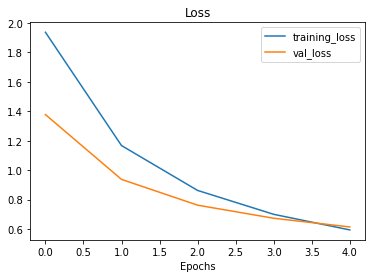

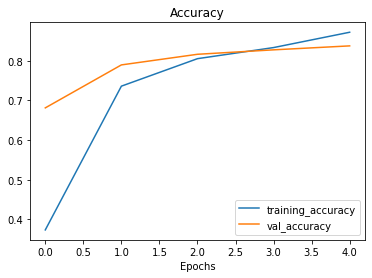

In [ ]:
plot_loss_curves(history_0)

# Getting a feature vector from a trained model

Let's demonstrate the Global Average Pooling 2D layer...

In [ ]:
# Defining an input shape
input_shape = (1, 4, 4, 3)

# Creating a random tensor
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor:\n {input_tensor}\n")

# Passing the input tensor through a global average pooling 2D layer
global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(global_average_pooled_tensor)

# Shape of the tensors
print(f"Shape of the input tensor: {input_tensor.shape}\nShape of the pooled tensor: {global_average_pooled_tensor.shape}")

Random input tensor:
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.26454744]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.891714   -0.9384712 ]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728497  0.40125778 -1.4145442 ]
   [-0.59318566 -1.6617213   0.33567193]
   [ 0.10815629  0.2347968  -0.56668764]
   [-0.35819843  0.88698626  0.5274477 ]]]]

tf.Tensor([[-0.09368646 -0.45840445 -0.28855976]], shape=(1, 3), dtype=float32)
Shape of the input tensor: (1, 4, 4, 3)
Shape of the pooled tensor: (1, 3)


In [ ]:
# Replicating the GlobalAveragePool2D layer
tf.reduce_mean(input_tensor, axis=[1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840445, -0.28855976]], dtype=float32)>

In [ ]:
# Defining an input shape
input_shape1 = (1, 4, 4, 3)

# Creating a random tensor
tf.random.set_seed(1)
input_tensor1 = tf.random.normal(input_shape1)
print(f"Random input tensor:\n {input_tensor1}\n")

# Passing the input tensor through a global max pool 2D layer
global_max_pooled_tensor = tf.keras.layers.GlobalMaxPool2D()(input_tensor1)
print(global_max_pooled_tensor)

# Shape of the tensors
print(f"Shape of the input tensor: {input_tensor1.shape}\nShape of the pooled tensor: {global_max_pooled_tensor.shape}")

Random input tensor:
 [[[[-1.1012203   1.5457517   0.383644  ]
   [-0.87965786 -1.2246722  -0.9811211 ]
   [ 0.08780783 -0.20326038 -0.5581562 ]
   [-0.72054404 -0.6259924  -0.71502596]]

  [[-0.34835446 -0.33646983  0.18257578]
   [ 1.1085953   1.2796587  -0.02147584]
   [-0.31968883  0.37332553  0.25279108]
   [ 0.6437664   2.146308   -0.82514983]]

  [[-0.9041368   1.3948786   1.2248751 ]
   [ 0.0586496  -0.49213138 -0.81997806]
   [-0.18526012 -0.39277685 -0.6585226 ]
   [-0.9833388   0.38883775 -1.0372448 ]]

  [[-1.5600569  -0.15791255 -0.3566943 ]
   [-0.20044029  1.613107    0.6796728 ]
   [ 0.08133233  1.3380764   1.1848053 ]
   [-0.35381562 -0.10400175 -0.75114644]]]]

tf.Tensor([[1.1085953 2.146308  1.2248751]], shape=(1, 3), dtype=float32)
Shape of the input tensor: (1, 4, 4, 3)
Shape of the pooled tensor: (1, 3)


In [ ]:
# Replicating the GlobalMaxPool2D layer
tf.reduce_max(input_tensor1, axis=[1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[1.1085953, 2.146308 , 1.2248751]], dtype=float32)>

# Model_1

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

zip_ref = zipfile.ZipFile("10_food_classes_1_percent.zip")
zip_ref.extractall()
zip_ref.close()

--2021-07-08 10:07:03--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.128, 142.251.2.128, 142.250.141.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip.1’

10_food_classes_1_p 100%[===================>] 127.42M   183MB/s    in 0.7s    

2021-07-08 10:07:04 (183 MB/s) - ‘10_food_classes_1_percent.zip.1’ saved [133612354/133612354]



In [ ]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

In [ ]:
walk_through_dir("/content/10_food_classes_1_percent")

There are 2 directories and 0 images in '/content/10_food_classes_1_percent'.
There are 10 directories and 0 images in '/content/10_food_classes_1_percent/train'.
There are 0 directories and 7 images in '/content/10_food_classes_1_percent/train/pizza'.
There are 0 directories and 7 images in '/content/10_food_classes_1_percent/train/chicken_curry'.
There are 0 directories and 7 images in '/content/10_food_classes_1_percent/train/chicken_wings'.
There are 0 directories and 7 images in '/content/10_food_classes_1_percent/train/ramen'.
There are 0 directories and 7 images in '/content/10_food_classes_1_percent/train/grilled_salmon'.
There are 0 directories and 7 images in '/content/10_food_classes_1_percent/train/sushi'.
There are 0 directories and 7 images in '/content/10_food_classes_1_percent/train/fried_rice'.
There are 0 directories and 7 images in '/content/10_food_classes_1_percent/train/ice_cream'.
There are 0 directories and 7 images in '/content/10_food_classes_1_percent/train/h

In [ ]:
train_dir = "/content/10_food_classes_1_percent/train"
test_dir = "/content/10_food_classes_1_percent/test"

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [ ]:
train_data = image_dataset_from_directory(train_dir,
                                          image_size = (224, 224),
                                          label_mode = "categorical")

test_data = image_dataset_from_directory(test_dir,
                                         image_size = (224, 224),
                                         label_mode = "categorical")

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


## Adding data augmentation right into the model

To add data augmentation right into our models, we can use the layers inside:
* 'tf.keras.layers.experimental.preprocessing()'      - Maybe without experimental. Namely directly ('tf.keras.layers.preprocessing()' - maybe not!!!)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Create data augmentation stage (layer) with horizontal flipping, rotations, zooms, etc
data_augmentation = keras.Sequential([
  preprocessing.RandomFlip("horizontal"),
  preprocessing.RandomRotation(0.2),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2),
  #preprocessing.Rescale(1./255) #Keep this layer for models like ResNet, but the models like EfficientNet have rescaling built-in
], name = "data_augmentation_layer")

# Visualizing data augmentation

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

Text(0.5, 1.0, "Augmented image of: 'steak'")

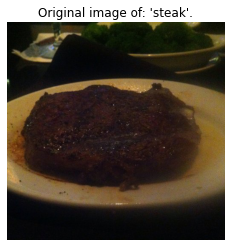

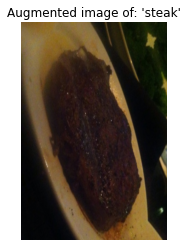

In [ ]:
target_class = random.choice(train_data.class_names)
target_dir = "/content/10_food_classes_1_percent/train/" + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" + random_image

# Read and plot the random image
img = mpimg.imread(random_image_path)

plt.imshow(img)
plt.axis(False)
plt.title(f"Original image of: '{target_class}'.")

# Plotting augmented images
augmented_image = data_augmentation(tf.expand_dims(img, axis=0))
plt.figure()
plt.imshow(tf.squeeze(augmented_image)/255.)
plt.axis(False)
plt.title("Augmented image of: '{}'".format(target_class))

## Starting to create Model 1 feature extraction transfer learning on 1% of the data with data augmentation

In [ ]:
# Setting up the input shape and freezing the base model layers
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Creating the input layer
inputs = tf.keras.layers.Input(shape=(224,224,3), name="Input_layer")

# Add in data augmentation Sequential model as a layer
x = data_augmentation(inputs)

# Giving inputs to the base model
x = base_model(x, training=False)

# Pooling the output features of the base model
x = tf.keras.layers.GlobalAveragePooling2D(name="pooling_layer")(x)

# Putting a Dense layer as the output
outputs = tf.keras.layers.Dense(10, activation="softmax", name="Output_layer")(x)

# Creating a model using inputs and outputs 
model_1 = tf.keras.Model(inputs, outputs)

# Compiling the model
model_1.compile(loss = tf.keras.losses.categorical_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

16711680/16705208 [==============================] - 1s 0us/step


In [ ]:
# Fitting the model
history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data),
                        callbacks = [create_tensorboard_callback("histories","model_1_history")])

Saving TensorBoard log files to: histories/model_1_history/20210708-073048
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


3/3 [==============================] - 48s 7s/step - loss: 2.3316 - accuracy: 0.1143 - val_loss: 2.1864 - val_accuracy: 0.2116
Epoch 2/5
3/3 [==============================] - 9s 4s/step - loss: 2.0466 - accuracy: 0.2286 - val_loss: 2.0719 - val_accuracy: 0.2868
Epoch 3/5
3/3 [==============================] - 9s 4s/step - loss: 1.8640 - accuracy: 0.4143 - val_loss: 1.9687 - val_accuracy: 0.3500
Epoch 4/5
3/3 [==============================] - 9s 4s/step - loss: 1.7546 - accuracy: 0.5000 - val_loss: 1.8770 - val_accuracy: 0.4060
Epoch 5/5
3/3 [==============================] - 9s 4s/step - loss: 1.6481 - accuracy: 0.6000 - val_loss: 1.7910 - val_accuracy: 0.4552


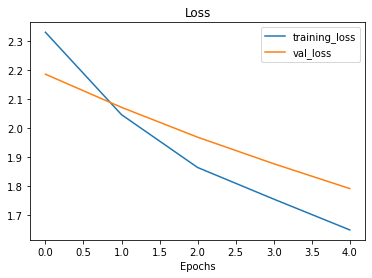

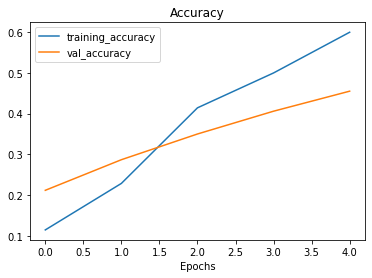

In [ ]:
plot_loss_curves(history_1)

#Model 2

In [ ]:
inputs = tf.keras.layers.Input(shape = (224, 224, 3))

x = data_augmentation(inputs)

x = base_model(x, training = False)

x = tf.keras.layers.GlobalAveragePooling2D()(x)

outputs = tf.keras.layers.Dense(10, activation="softmax")(x)

model_2 = tf.keras.Model(inputs, outputs)

model_2.compile(loss = tf.keras.losses.categorical_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])
"""
history_2 = model_2.fit(train_data_10_percent,
                        epochs = 5,
                        steps_per_epoch = len(train_data_10_percent),
                        validation_data = test_data,
                        validation_steps = len(test_data),
                        callbacks = [create_tensorboard_callback("histories", "model_2_history")])
"""

'\nhistory_2 = model_2.fit(train_data_10_percent,\n                        epochs = 5,\n                        steps_per_epoch = len(train_data_10_percent),\n                        validation_data = test_data,\n                        validation_steps = len(test_data),\n                        callbacks = [create_tensorboard_callback("histories", "model_2_history")])\n'

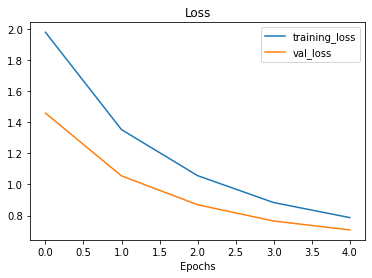

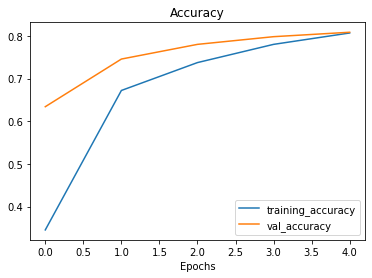

In [ ]:
plot_loss_curves(history_2)

# Creating a model checkpoint callback

In [ ]:
# Setting checkpoint path
checkpoint_path = "ten_percent_model_checkpoints_weight/checkpoint.ckpt"

# Creating a ModelCheckpoint callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only = False,
                                                         save_freq = "epoch",
                                                         verbose = 1)

In [ ]:
history_2_1 = model_2.fit(train_data_10_percent,
                          epochs = 5,
                          steps_per_epoch = len(train_data_10_percent),
                          validation_data = test_data,
                          validation_steps = int(0.25 * (len(test_data))),
                          callbacks = [create_tensorboard_callback("histories", "model_2_history"), checkpoint_callback])

Saving TensorBoard log files to: histories/model_2_history/20210708-184132
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 15s 626ms/step - loss: 1.9745 - accuracy: 0.3587 - val_loss: 1.4392 - val_accuracy: 0.6793

Epoch 00001: saving model to ten_percent_model_checkpoints_weight/checkpoint.ckpt
Epoch 2/5
24/24 [==============================] - 10s 420ms/step - loss: 1.3467 - accuracy: 0.6587 - val_loss: 1.0310 - val_accuracy: 0.7878

Epoch 00002: saving model to ten_percent_model_checkpoints_weight/checkpoint.ckpt
Epoch 3/5
24/24 [==============================] - 11s 428ms/step - loss: 1.0540 - accuracy: 0.7440 - val_loss: 0.8258 - val_accuracy: 0.8158

Epoch 00003: saving model to ten_percent_model_checkpoints_weight/checkpoint.ckpt
Epoch 4/5
24/24 [==============================] - 10s 417ms/step - loss: 0.9070 - accuracy: 0.7747 - val_loss: 0.7333 - val_accuracy: 0.8174

Epoch 00004: saving model to ten_percent_model_checkpoints_weight/checkpoint.ckpt
Epoch 5/5
24/24 [==============================] - 10s 431ms/step - loss: 0.7912 - accuracy: 0.8053 - val_loss

### Loading in checkpointed weights

Loading in checkpointed weights returns a model to a specific checkpoint.

In [ ]:
# Load in saved model weights and evaluate model

model_2.load_weights(checkpoint_path)

# Model 3

Fine-tuning

In [ ]:
# Layers in loaded model

model_2.layers

In [ ]:
# Are these layers trainable

for layer in model_2.layers:
  print(layer,layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f420034aa90> True
<tensorflow.python.keras.engine.sequential.Sequential object at 0x7f4205cfc290> True
<tensorflow.python.keras.engine.functional.Functional object at 0x7f4200bc6d10> False
<tensorflow.python.keras.layers.pooling.GlobalAveragePooling2D object at 0x7f420034aad0> True
<tensorflow.python.keras.layers.core.Dense object at 0x7f420034add0> True


In [ ]:
# Layers in our base model and are they trainable
for i, layer in enumerate(model_2.layers[2].layers):
  print(i, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_reshape F

In [ ]:
# How many trainable variables in our base model

print(len(model_2.layers[2].trainable_variables))

0


In [ ]:
# To begin fine-tuning, let's start by setting the last 10 layers of our base_model.trainable = True
base_model.trainable = True

# Freeze all layers except for the last 10
for layer in base_model.layers[:-10]:
  layer.trainable = False

# Recompile (we have to recompile our models every time we make a change)
model_2.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), #When fine-tunnig, it is useful to lower the learning rate by 10x*
                metrics = ["accuracy"])

In [ ]:
# Check which layers are tunable (trainable)
for layer_number, layer in enumerate(model_2.layers[2].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_reshape F

In [ ]:
print(len(model_2.layers[2].trainable_variables))

10


In [ ]:
print(len(model_2.trainable_variables))

12


In [ ]:
# Fine-tune for another 5 epochs
fine_tune_epochs  = 10

# Refitting the model
history_fine = model_2.fit(train_data_10_percent,
                           epochs = fine_tune_epochs,
                           steps_per_epoch = len(train_data_10_percent),
                           validation_data = test_data,
                           validation_steps = int(0.25*(len(test_data))),
                           initial_epoch = history_2_1.epoch[-1], #start training from previous last epoch
                           callbacks = [create_tensorboard_callback("histories", "model_3_fine_tune_history")])

Saving TensorBoard log files to: histories/model_3_fine_tune_history/20210708-152343
Epoch 5/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


3/3 [==============================] - 53s 22s/step - loss: 1.5862 - accuracy: 0.6571 - val_loss: 1.7505 - val_accuracy: 0.5148
Epoch 6/10
3/3 [==============================] - 44s 21s/step - loss: 1.4260 - accuracy: 0.7857 - val_loss: 1.6784 - val_accuracy: 0.5411
Epoch 7/10
3/3 [==============================] - 29s 14s/step - loss: 1.2826 - accuracy: 0.8714 - val_loss: 1.6223 - val_accuracy: 0.5576
Epoch 8/10
3/3 [==============================] - 44s 21s/step - loss: 1.1746 - accuracy: 0.8571 - val_loss: 1.5295 - val_accuracy: 0.5872
Epoch 9/10
3/3 [==============================] - 29s 14s/step - loss: 1.0949 - accuracy: 0.8857 - val_loss: 1.4780 - val_accuracy: 0.5789
Epoch 10/10
3/3 [==============================] - 44s 21s/step - loss: 0.9320 - accuracy: 0.9429 - val_loss: 1.4347 - val_accuracy: 0.5888


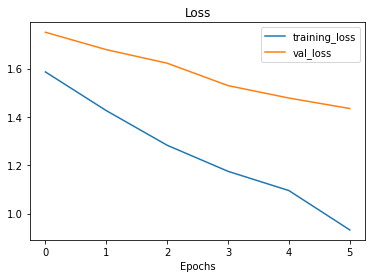

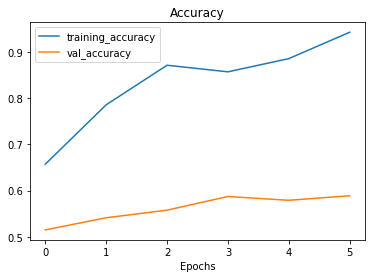

In [ ]:
plot_loss_curves(history_fine)

In [ ]:
# Creating a function to compare training histories

def compare_histories(original_history, new_history, initial_epoch = 5):
  # Get original history measurements
  acc = original_history.history["accuracy"]
  loss = original_history.history["loss"]

  val_acc = original_history.history["val_accuracy"]
  val_loss = original_history.history["val_loss"]

  # Combine original history metrics with new_history metrics
  total_acc = acc + new_history.history["accuracy"]
  total_loss = loss + new_history.history["loss"]

  total_val_acc = val_acc + new_history.history["val_accuracy"]
  total_val_loss = val_loss + new_history.history["val_loss"]

  # Make plots
  plt.figure(figsize = (8,8))
  plt.subplot(2, 1, 1)
  plt.plot(total_acc, label = "Training Accuracy")
  plt.plot(total_val_acc, label = "Validation Accuracy")
  plt.plot([initial_epoch - 1, initial_epoch - 1], plt.ylim(), label = "Start Fine Tuning")
  plt.legend(loc="lower right")
  plt.title("Training and validation accuracy")

  plt.subplot(2, 1, 2)
  plt.plot(total_loss, label = "Training Loss")
  plt.plot(total_val_loss, label = "Validation Loss")
  plt.plot([initial_epoch - 1, initial_epoch - 1], plt.ylim(), label = "Start Fine Tuning")
  plt.legend(loc="upper right")
  plt.title("Training and validation Loss")

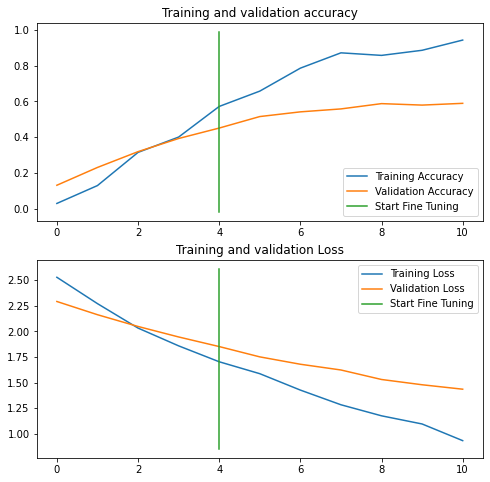

In [ ]:
compare_histories(history_2_1, history_fine)

Model 4

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()

--2021-07-08 18:35:12--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.128, 142.250.141.128, 2607:f8b0:4023:c0b::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M   205MB/s    in 2.4s    

2021-07-08 18:35:14 (205 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [ ]:
import tensorflow as tf

train_dir = "/content/10_food_classes_all_data/train"
test_dir = "/content/10_food_classes_all_data/test"

train_data_all = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                     label_mode = "categorical",
                                                                     image_size = (224, 224))
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode = "categorical",
                                                                image_size = (224, 224))

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
history_fine_2 = model_2.fit(train_data_all,
                             epochs = 15,
                             steps_per_epoch = len(train_data_all),
                             validation_data = test_data,
                             validation_steps = len(test_data),
                             initial_epoch = history_fine.epoch[-1],
                             callbacks = [create_tensorboard_callback("histories", "fine_tune_2_model_4")]) 

Saving TensorBoard log files to: histories/fine_tune_2_model_4/20210708-163429
Epoch 10/15


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


235/235 [==============================] - 544s 2s/step - loss: 0.7395 - accuracy: 0.7624 - val_loss: 0.3768 - val_accuracy: 0.8772
Epoch 11/15
235/235 [==============================] - 530s 2s/step - loss: 0.4935 - accuracy: 0.8401 - val_loss: 0.3066 - val_accuracy: 0.9016
Epoch 12/15
235/235 [==============================] - 566s 2s/step - loss: 0.4106 - accuracy: 0.8659 - val_loss: 0.3462 - val_accuracy: 0.8892
Epoch 13/15
235/235 [==============================] - 575s 2s/step - loss: 0.3429 - accuracy: 0.8885 - val_loss: 0.3315 - val_accuracy: 0.8892
Epoch 14/15
235/235 [==============================] - 575s 2s/step - loss: 0.2886 - accuracy: 0.9056 - val_loss: 0.3111 - val_accuracy: 0.8980
Epoch 15/15
235/235 [==============================] - 586s 2s/step - loss: 0.2565 - accuracy: 0.9116 - val_loss: 0.3106 - val_accuracy: 0.9008


#Model 4 Revision

In [ ]:
# Load model from checkpoint
model_2.load_weights(checkpoint_path)

In [ ]:
# Check which layers are tunable
for layer_number, layer in enumerate(model_2.layers):
  print(layer_number, layer.name, layer.trainable) 

0 input_4 True
1 data_augmentation_layer True
2 efficientnetb0 True
3 global_average_pooling2d True
4 dense True


In [ ]:
for i, layer in enumerate(model_2.layers[2].layers):
  print(i, layer.name, layer.trainable)

0 input_3 False
1 rescaling False
2 normalization False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_reshape F

In [ ]:
model_2.compile(loss = tf.keras.losses.categorical_crossentropy,
                optimizer = tf.keras.optimizers.Adam(0.0001),
                metrics = ["accuracy"])

history_fine_tune_2_revision = model_2.fit(train_data_all,
                                           epochs = 10,
                                           steps_per_epoch = len(train_data_all),
                                           validation_data = test_data,
                                           validation_steps = int(0.25 * len(test_data)),
                                           initial_epoch = history_2_1.epoch[-1],
                                           callbacks = [create_tensorboard_callback("histories", "model_4")])

Saving TensorBoard log files to: histories/model_4/20210708-190836
Epoch 5/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


235/235 [==============================] - 75s 292ms/step - loss: 0.7168 - accuracy: 0.7707 - val_loss: 0.4040 - val_accuracy: 0.8734
Epoch 6/10
235/235 [==============================] - 56s 238ms/step - loss: 0.5834 - accuracy: 0.8120 - val_loss: 0.3523 - val_accuracy: 0.8882
Epoch 7/10
235/235 [==============================] - 52s 219ms/step - loss: 0.5253 - accuracy: 0.8304 - val_loss: 0.3263 - val_accuracy: 0.8964
Epoch 8/10
235/235 [==============================] - 51s 215ms/step - loss: 0.4769 - accuracy: 0.8465 - val_loss: 0.3393 - val_accuracy: 0.8947
Epoch 9/10
235/235 [==============================] - 48s 201ms/step - loss: 0.4348 - accuracy: 0.8601 - val_loss: 0.3249 - val_accuracy: 0.9079
Epoch 10/10
235/235 [==============================] - 45s 192ms/step - loss: 0.4073 - accuracy: 0.8731 - val_loss: 0.2863 - val_accuracy: 0.9112


In [ ]:
model_4_results = model_2.evaluate(test_data)

79/79 [==============================] - 9s 109ms/step - loss: 0.3022 - accuracy: 0.9020


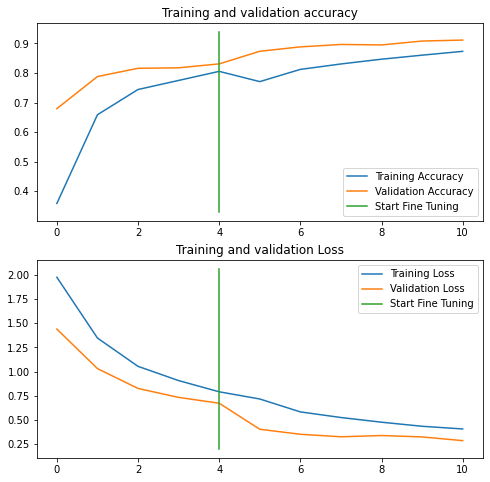

In [ ]:
compare_histories(history_2_1, history_fine_tune_2_revision)

# Comparing all of the experiment results

**Note**: Tensorboard.dev e yüklenen herşey public olur. Bu yüzden özel dosyalar yüklenmemelidir!!!

In [ ]:
# Viewing tensorboard logs of transfer learning modelling experiments
# Upload TensorBoard dev records

!tensorboard dev upload --logdir ./histories \
  --name "Transfer Learning Experiments with 10 Food101 Classes" \
  --description "A series of different transfer learning experiments with varying amounts of data and fine-tuning." \
  --one_shot # Exits the uploader once it s finished uploading

2021-07-08 19:37:15.681621: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./histories

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Ao

My tensorboard experiments are available at: https://tensorboard.dev/experiment/Hw0aqTybRvG1P877ue28rg/

In [ ]:
# How to delete from tensorboard dev (which is public)

# Getting the list of tensorboard.dev experiments that have been uploaded (public)
!tensorboard dev list

2021-07-08 19:47:36.826786: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Data for the "text" plugin is now uploaded to TensorBoard.dev! Note that uploaded data is public. If you do not want to upload data for this plugin, use the "--plugins" command line argument.
https://tensorboard.dev/experiment/Hw0aqTybRvG1P877ue28rg/
	Name                 Transfer Learning Experiments with 10 Food101 Classes
	Description          A series of different transfer learning experiments with varying amounts of data and fine-tuning.
	Id                   Hw0aqTybRvG1P877ue28rg
	Created              2021-07-08 19:37:47 (9 minutes ago)
	Updated              2021-07-08 19:37:49 (9 minutes ago)
	Runs                 4
	Tags                 5
	Scalars              66
	Tensor bytes         0
	Binary object bytes  1720857
https://tensorboard.dev/experiment/ugEoEMKSRRaWuZ9EMF6Wdw/
	Name                 EfficientNetB0 vs. ResNet50v2
	Descrip

In [ ]:
# Every experiment has its own unique Id which can be found on the tensorboard dev list (!tensorboard dev list) -experiments' list-. 
# To delete an experiment from the list, we do the steps below; (we should ofc uncomment the code below)

"""
!tensorboard dev delete --experiment_id Hw0aqTybRvG1P877ue28rg # Id of the experiment in the list above. I have used the 1st experiment's Id as an example.
"""

# Challenges

### Experiment with EfficientNetB4

In [ ]:
base_model = tf.keras.applications.EfficientNetB4(include_top=False,
                                                  input_shape = (224, 224, 3),
                                                  classes = 10)

In [ ]:
base_model.trainable = False

In [ ]:
from tensorflow.keras.layers.experimental import preprocessing

In [ ]:
data_augmentation_layer = tf.keras.models.Sequential([
  preprocessing.RandomFlip("horizontal"),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomRotation(0.2),
  preprocessing.RandomWidth(0.2),
  # preprocessing.Rescaling(1./255), # It should be included for models such as ResNet as they don t have built-in normalization but EfficientNet has...
  preprocessing.RandomZoom(0.2)
], name = "data_augmentation_layer")

In [ ]:
inputs = tf.keras.layers.Input(shape=(224, 224, 3))

In [ ]:
x = data_augmentation_layer(inputs)

In [ ]:
x = base_model(x, training = False)

In [ ]:
x = tf.keras.layers.GlobalAveragePooling2D()(x)

In [ ]:
outputs = tf.keras.layers.Dense(10, activation="softmax")(x)

In [ ]:
model_b4 = tf.keras.Model(inputs, outputs)

In [ ]:
model_b4.compile(loss = tf.keras.losses.categorical_crossentropy,
                 optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
                 metrics = ["accuracy"])

In [ ]:
checkpoint_path_b4 = "model_b4_checkpoints_weight/checkpoint_b4.ckpt"

checkpoint_callback_b4 = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                            save_weights_only=True,
                                                            save_best_only = False,
                                                            save_freq = "epoch",
                                                            verbose = 1)

In [ ]:
history_b4 = model_b4.fit(train_data_10_percent,
                          epochs = 5,
                          steps_per_epoch = len(train_data_10_percent),
                          validation_data = test_data,
                          validation_steps = int(0.25 * len(test_data)),
                          callbacks = [create_tensorboard_callback("histories","history_b4"), checkpoint_callback_b4])

Saving TensorBoard log files to: histories/history_b4/20210708-203208
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 28s 785ms/step - loss: 2.3519 - accuracy: 0.0973 - val_loss: 2.2526 - val_accuracy: 0.1776

Epoch 00001: saving model to ten_percent_model_checkpoints_weight/checkpoint.ckpt
Epoch 2/5
24/24 [==============================] - 15s 604ms/step - loss: 2.2323 - accuracy: 0.1720 - val_loss: 2.1328 - val_accuracy: 0.2434

Epoch 00002: saving model to ten_percent_model_checkpoints_weight/checkpoint.ckpt
Epoch 3/5
24/24 [==============================] - 15s 609ms/step - loss: 2.1124 - accuracy: 0.2507 - val_loss: 2.0150 - val_accuracy: 0.3816

Epoch 00003: saving model to ten_percent_model_checkpoints_weight/checkpoint.ckpt
Epoch 4/5
24/24 [==============================] - 15s 595ms/step - loss: 2.0254 - accuracy: 0.3627 - val_loss: 1.9095 - val_accuracy: 0.4885

Epoch 00004: saving model to ten_percent_model_checkpoints_weight/checkpoint.ckpt
Epoch 5/5
24/24 [==============================] - 15s 599ms/step - loss: 1.9215 - accuracy: 0.4573 - val_loss

In [ ]:
base_model.trainable = True

for layer in base_model.layers[:-10]:
  layer.trainable = False

In [ ]:
model_b4.load_weights(checkpoint_path)

In [ ]:
model_b4.compile(loss = tf.keras.losses.categorical_crossentropy,
                 optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
                 metrics = ["accuracy"])

In [ ]:
model_b4_fine_tune_history = model_b4.fit(train_data_all,
                                          epochs = 10,
                                          initial_epoch = history_b4.epoch[-1],
                                          validation_data = test_data,
                                          validation_steps = int(0.25 * len(test_data)),
                                          callbacks = [create_tensorboard_callback("histories","b4_fine_tune_history")])

Saving TensorBoard log files to: histories/b4_fine_tune_history/20210708-204351
Epoch 5/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


235/235 [==============================] - 149s 422ms/step - loss: 0.9264 - accuracy: 0.7020 - val_loss: 0.4316 - val_accuracy: 0.8553
Epoch 6/10
235/235 [==============================] - 92s 388ms/step - loss: 0.6523 - accuracy: 0.7865 - val_loss: 0.3633 - val_accuracy: 0.8931
Epoch 7/10
235/235 [==============================] - 88s 373ms/step - loss: 0.5761 - accuracy: 0.8117 - val_loss: 0.3608 - val_accuracy: 0.8882
Epoch 8/10
235/235 [==============================] - 85s 362ms/step - loss: 0.5159 - accuracy: 0.8259 - val_loss: 0.3624 - val_accuracy: 0.8717
Epoch 9/10
235/235 [==============================] - 77s 325ms/step - loss: 0.4874 - accuracy: 0.8391 - val_loss: 0.3329 - val_accuracy: 0.8898
Epoch 10/10
235/235 [==============================] - 76s 322ms/step - loss: 0.4409 - accuracy: 0.8532 - val_loss: 0.3162 - val_accuracy: 0.9030


In [ ]:
model_b4.evaluate(test_data)

79/79 [==============================] - 16s 198ms/step - loss: 0.3464 - accuracy: 0.8896


[0.34638652205467224, 0.8895999789237976]